In [167]:
d=pd.DataFrame({'key1':['a','b','a','b','a'],'total':[1,2,3,4,5]})
d

,key1,total
0,a,1
1,b,2
2,a,3
3,b,4
4,a,5


In [171]:
d.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [172]:
d.groupby('key1').sum()

,total
key1,
a,9
b,6


# Working with json file

In [9]:
path=(r'C:\Users\Shubhamay\Desktop\example.txt.txt')
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [10]:
#read the json file
import json
path=r'C:\Users\Shubhamay\Desktop\example.txt.txt'
records=[json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [11]:
#counting time zone
time_zones=[rec['tz'] for rec in records if 'tz' in rec]

In [12]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [13]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts :
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [14]:
 #using more advance libraru in python you can write same code briefly
from collections import defaultdict
def get_counts_2(sequence):
    counts=defaultdict(int)#value will initialize to zero
    if x in sequence:
        counts[x]+=1
    return counts

In [15]:
counting=get_counts(time_zones)
counting

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [16]:
counting['America/New_York']

1251

In [17]:
len(counting)

97

In [18]:
len(time_zones)

3440

In [19]:
#we want top count
def top_10_count(count_dict,n=10):
    key_value_pair=[(count,tz)  for tz,count in count_dict.items()]
    key_value_pair.sort()
    return key_value_pair[-n:]

In [20]:
top_10_count(counting)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [21]:
#same using standerd library:
from collections import Counter
counts=Counter(time_zones)
most_10_common=counts.most_common(10)
most_10_common

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

    counting time zones with pandas

In [22]:
import pandas as pd
frame=pd.DataFrame(records)

In [23]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [24]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [25]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [26]:
#top 10 time zone
tz_counts=frame['tz'].value_counts()
tz_counts

America/New_York         1251
                          521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
Europe/Sofia                1
Asia/Nicosia                1
America/Santo_Domingo       1
America/Monterrey           1
Africa/Lusaka               1
Name: tz, Length: 97, dtype: int64

In [27]:
# we can bit of mungling to ill in a substitute for missing value and missing time zone data in the records
clean_tz=frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Un-knowns/'

In [28]:


tz_counts=clean_tz.value_counts()

In [29]:
tz_counts[:10]

America/New_York       1251
Un-knowns/              521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

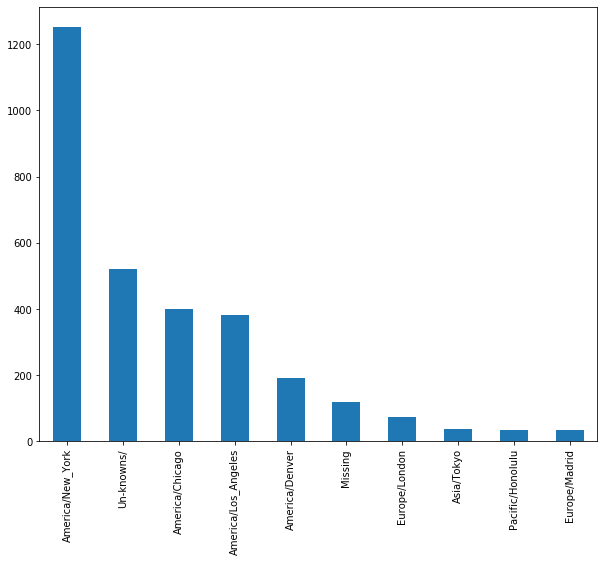

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
tz_counts[:10].plot.bar()

plt.show()

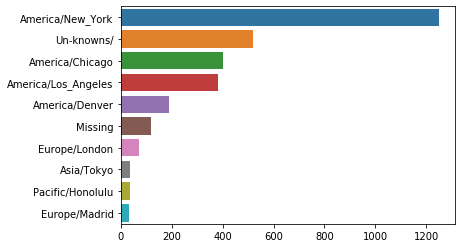

In [31]:
import seaborn as sns
subset=tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [32]:
#the field contains information about the browser,devices or URL used to perform the URL shortening
frame['a']

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3560, dtype: object

In [33]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [34]:
result=pd.Series([x.split()[0] for x in frame['a'].dropna()])

In [35]:
result[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [36]:
result.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64


np.where() is a function that returns ndarray which is x if condition is True and y if condition is False .x,y and condition need to broacastable to same shape

In [37]:
import numpy as np
a=np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
b=np.where(a<4,1,100)

In [39]:
b

array([[  1,   1,   1],
       [  1, 100, 100],
       [100, 100, 100]])

In [40]:
m=np.array([[0,1,2],[0,2,4],[0,3,6]])
m

array([[0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

In [41]:
p=np.where(m<4,m,m*10)

In [42]:
p

array([[ 0,  1,  2],
       [ 0,  2, 40],
       [ 0,  3, 60]])

In [43]:
#suppose u want to decompose the top time zone into window and non windows users.
c_frame=frame[frame.a.notnull()]
c_frame['os']=np.where(c_frame.a.str.contains('Windows'),'Windows','Non Windows')
c_frame['os'][:5]

C:\Users\Shubhamay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        Windows
1    Non Windows
2        Windows
3    Non Windows
4        Windows
Name: os, dtype: object

In [44]:
by_tz_os=c_frame.groupby(['os','tz'])

In [45]:
by_tz_os.size()

os           tz                            
Non Windows                                    245
             America/Anchorage                   4
             America/Argentina/Buenos_Aires      1
             America/Bogota                      1
             America/Chicago                   115
                                              ... 
Windows      Europe/Vilnius                      2
             Europe/Volgograd                    1
             Europe/Warsaw                      15
             Pacific/Auckland                    8
             Pacific/Honolulu                   36
Length: 149, dtype: int64

In [46]:
by_tz_os.size().unstack()

tz,,Africa/Cairo,Africa/Casablanca,Africa/Ceuta,Africa/Johannesburg,Africa/Lusaka,America/Anchorage,America/Argentina/Buenos_Aires,America/Argentina/Cordoba,America/Argentina/Mendoza,...,Europe/Sofia,Europe/Stockholm,Europe/Uzhgorod,Europe/Vienna,Europe/Vilnius,Europe/Volgograd,Europe/Warsaw,Europe/Zurich,Pacific/Auckland,Pacific/Honolulu
os,,,,,,,,,,,,,,,,,,,,,
Non Windows,245.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,NaN,2.0,NaN,3.0,NaN,NaN,1.0,4.0,3.0,NaN
Windows,276.0,3.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,...,1.0,12.0,1.0,3.0,2.0,1.0,15.0,NaN,8.0,36.0


In [149]:
by_os_tz=c_frame.groupby(['tz','os'])
by_os_tz.size()

tz                 os         
                   Non Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Non Windows      4
Pacific/Auckland   Non Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [48]:
agg_count=by_os_tz.size().unstack().fillna(0)
agg_count[:10]

os,Non Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [49]:
agg_count.sum()

os
Non Windows    1194.0
Windows        2246.0
dtype: float64

In [50]:
agg_count.sum(1)

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [51]:
indexer=agg_count.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [61]:
index=agg_count.sum(0).argsort()
index[:10]

os
Non Windows    0
Windows        1
dtype: int64

argsort:Return the indices that would sort an array.it return an array of indices of the same shape as that index data  along the given axis in sorted order.

In [135]:
import pandas as pd

In [136]:
d=pd.Series([4,1,3,0,2])
d

0    4
1    1
2    3
3    0
4    2
dtype: int64

In [137]:
h=np.argsort(d)
h

0    3
1    1
2    4
3    2
4    0
dtype: int64

In [138]:
d.take(h)

3    0
1    1
4    2
2    3
0    4
dtype: int64

In [139]:
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [140]:
#I use take to select the row in order that ,then slice of last 10 rows(largest values)
count_subset=agg_count.take(indexer[-10:])

In [69]:
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [141]:
count_subset

os,Non Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [142]:
agg_count.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [143]:

count_subset=count_subset.stack()


In [144]:
count_subset.name='total'


In [145]:
count_subset

tz                   os         
America/Sao_Paulo    Non Windows     13.0
                     Windows         20.0
Europe/Madrid        Non Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Non Windows      0.0
                     Windows         36.0
Asia/Tokyo           Non Windows      2.0
                     Windows         35.0
Europe/London        Non Windows     43.0
                     Windows         31.0
America/Denver       Non Windows    132.0
                     Windows         59.0
America/Los_Angeles  Non Windows    130.0
                     Windows        252.0
America/Chicago      Non Windows    115.0
                     Windows        285.0
                     Non Windows    245.0
                     Windows        276.0
America/New_York     Non Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [147]:
count_subset=count_subset.reset_index()
count_subset

,index,tz,os,total
0,0,America/Sao_Paulo,Non Windows,13.0
1,1,America/Sao_Paulo,Windows,20.0
2,2,Europe/Madrid,Non Windows,16.0
3,3,Europe/Madrid,Windows,19.0
4,4,Pacific/Honolulu,Non Windows,0.0
5,5,Pacific/Honolulu,Windows,36.0
6,6,Asia/Tokyo,Non Windows,2.0
7,7,Asia/Tokyo,Windows,35.0
8,8,Europe/London,Non Windows,43.0
9,9,Europe/London,Windows,31.0


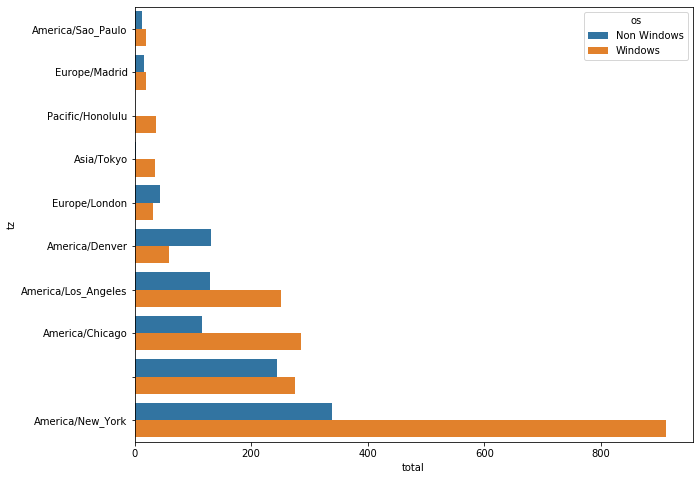

In [159]:
plt.figure(figsize=(10,8))
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

plt.show()

In [170]:
count_subset

,index,tz,os,total
0,0,America/Sao_Paulo,Non Windows,13.0
1,1,America/Sao_Paulo,Windows,20.0
2,2,Europe/Madrid,Non Windows,16.0
3,3,Europe/Madrid,Windows,19.0
4,4,Pacific/Honolulu,Non Windows,0.0
5,5,Pacific/Honolulu,Windows,36.0
6,6,Asia/Tokyo,Non Windows,2.0
7,7,Asia/Tokyo,Windows,35.0
8,8,Europe/London,Non Windows,43.0
9,9,Europe/London,Windows,31.0


In [176]:
#the plot does not make easy to see the relative percentage of window in the smaller group.
#so let normalize the group percentage to sum to to 1
#group.total~ony each type os user in any time zone
#group.total.sum() total userin any time zone
def norm_total(group):
    group['norm_total']=group.total/group.total.sum()
    return group

In [177]:
result=count_subset.groupby('tz').apply(norm_total)

In [178]:
result

,index,tz,os,total,norm_total
0,0,America/Sao_Paulo,Non Windows,13.0,0.393939
1,1,America/Sao_Paulo,Windows,20.0,0.606061
2,2,Europe/Madrid,Non Windows,16.0,0.457143
3,3,Europe/Madrid,Windows,19.0,0.542857
4,4,Pacific/Honolulu,Non Windows,0.0,0.000000
5,5,Pacific/Honolulu,Windows,36.0,1.000000
6,6,Asia/Tokyo,Non Windows,2.0,0.054054
7,7,Asia/Tokyo,Windows,35.0,0.945946
8,8,Europe/London,Non Windows,43.0,0.581081
9,9,Europe/London,Windows,31.0,0.418919


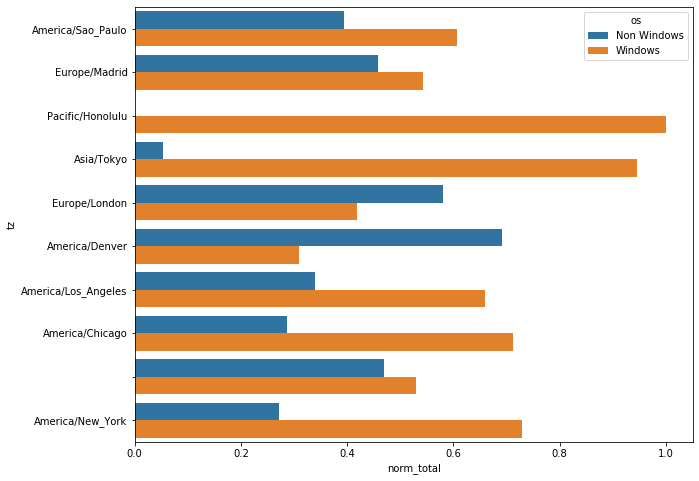

In [182]:
plt.figure(figsize=(10,8))
sns.barplot(x='norm_total',y='tz',hue='os',data=result)

In [183]:
#we compute the normalised method more sufficiently by using groupby method with transform method
g=count_subset.groupby('tz')
result2=count_subset.total/g.total.transform('sum')

In [184]:
#same as the count_subsets total norm column
result2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64